# Project 2 : :)
## Authors: Frederick Nilsen, Mia Rødde, Sara Abnar

### Warnings

* Ikke endre uten at de andre vet det
* **Alltid** gå på Kernel -> Restart & Clear Output
* Ikke skriv utenfor cellene og sånn

## Implementation of set 1 - points in 2D

In [4]:
## IMPORTS

import numpy as np
import matplotlib.pyplot as plt
import loader
import plotting
from spirals import get_data_spiral_2d

In [18]:
## GLOBAL CONSTS AND DEFINITIONS

sigma = lambda x : np.tanh(x)         # Activation function
eta = lambda x : 0.5*(1+np.tanh(x/2)) # Scalar function     
sech = lambda x : 1/np.cosh(x)
eta_ddx = lambda x :  0.25*sech(x/2)*sech(x/2) # Derivative of eta
sigma_ddx = lambda x: sech(x)*sech(x) # Derivative of sigma


K = 3 # +1 gives number of layers, arbitrary number
d = 2 # Ehh
tau = 0.07 # learning parameter [0.01,0.1]
Y0, C = get_data_spiral_2d(100) #Default n=200
C_colors = getColorFromLabel(C)
I = Y0.shape[1]
One = np.full((I,2),1)
W, b = np.random.randn(K,d,d), np.random.randn(K,d,1)     #startverdier
mu = 1 #?
w = np.random.randn(d,1)
h = 0.1

#U_i = [W, b, w, mu]

In [19]:
## INITIALISATION CELL

def getColorFromLabel(C):
    colorLst = []
    for el in C:
        if el:
            colorLst.append('r')
        else:
            colorLst.append('b')
    return colorLst

#optimert funksjon
def YK(W, b):
    #tom Y-matrise, 3-dimensjonalt numpy-array
    Ym = np.zeros((K+1,d,I))
    Ym[0,:,:] = np.copy(Y0)
    k=0
    while k < K:
        Ym[k+1] = Ym[k] + h*sigma(W[k]@Ym[k] + b[k])
        k+=1
    return Ym



#Finner P_K
def getGradients(K, W,b,w,mu):
    Y_all = YK(W,b)
    lastY = Y_all[K-1,:,:]
    P = np.full(Y_all.shape,0) # init matrix
    P[K] = w@np.transpose((Z(w,mu)-C)*eta_ddx(np.transpose(lastY)@w+mu))  #(7)
    dJdMU = eta_ddx(np.transpose(np.transpose(lastY)@w+mu))@(Z(w,mu)-C)   #(5), kunne også brukt .T for transpose
    dJdw = lastY@((Z(w,mu)-C)*eta_ddx(np.transpose(lastY)@w+mu))              #(6)
    for k in range(K,0,-1):
        P[k-1] = P[k]+h*np.transpose(W[k-1,:,:])@(sigma_ddx(W[k-1,:,:]@Y_all[k-1,:,:]+b[k-1,:,:])*P[k])  #(8)  
        #Endra til @
        #Endra første W[k-a] ??
        # feil med 'Y(k-1,W,b)' ??? alle matriser i lag k-1??
    dJdWk = np.zeros((K,d,d))
    dJdBk = np.zeros((K,d,1))
    
    for k in range(0,K-1):
        dJdWk[k] = h*(P[k+1]*sigma_ddx(W[k,:,:]@Y_all[k,:,:]+b[k,:,:]))@np.transpose(Y_all[k,:,:])  #(9)
        dJdBk[k] = h*(P[k+1]*sigma_ddx(W[k,:,:]@Y_all[k,:,:]+b[k,:,:]))@np.ones((I,1)) #One not needed?                     #(10)
    return dJdWk, dJdBk, dJdw, dJdMU


#Adam descent algorithn
def AdamAlg(uParam, U_ind, lastM, lastV):
    beta1 = 0.9
    beta2 = 0.999
    alpha = 0.01
    epsilon = 1e-8
    g = getGradients(K, W,b,w,mu)[U_ind]
    m = beta1*lastM+(1-beta1)*g
    v = beta2*lastV+(1-beta2)*(g*g)
    mhat = m/(1-beta1**(counter)) # NB må altså :)
    vhat = v/(1-beta2**(counter))
    uParam -= alpha*mhat/(np.sqrt(vhat)+epsilon)
    lastM = m
    lastV = v
    return uParam, lastM, lastV

IndentationError: expected an indented block (<ipython-input-4-f61faef558ce>, line 11)

In [20]:
#Lager siste Y_k = Y_K
YK_list = YK(W,b)
lastY = YK_list[K-1]

Z = lambda w,mu : eta(np.add(np.transpose(lastY)@w,mu))
#print(":)))")
J = 1/2*np.linalg.norm(Z(w,mu)-C)**2 # Cost function

In [21]:
# Algorithm
converged = False
counter = 1

#initializing list
thisMW = thisVW = 0
thisMb = thisVb = 0
thisMw = thisVw = 0
thisMmu = thisVmu = 0


#for AdamAlg
pltJ = []
for i in range(1,10001):   #Skal være 40001
    pltJ.append(J)
    W, thisMW, thisVW = AdamAlg(W, 0, thisMW, thisVW)
    b, thisMb, thisVb = AdamAlg(b, 1, thisMb, thisVb)
    w, thisMw, thisVw = AdamAlg(w, 2, thisMw, thisVw)
    mu, thisMmu, thisVmu = AdamAlg(mu, 3, thisMmu, thisVmu)
    counter = i 

### Generate new Y with fitted weights
testY, testC = 

W:  [[[ 0.83653107 -1.33566775]
  [ 1.06738899 -1.36894085]]

 [[-0.2781349   0.71178343]
  [-1.03097361  1.89329064]]

 [[ 0.73337091  0.44277997]
  [ 0.31007823 -1.21009601]]]
b:  [[[ 0.56402445]
  [ 0.09696415]]

 [[-1.04260993]
  [ 0.92460872]]

 [[ 0.90242179]
  [-0.28883808]]]
w:  [[0.18266147]
 [1.63437861]]
mu:  [[-0.07401603]]


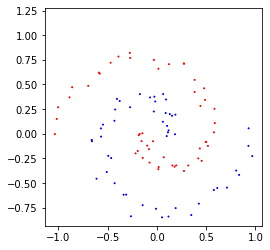

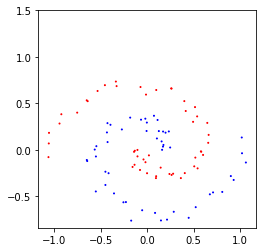

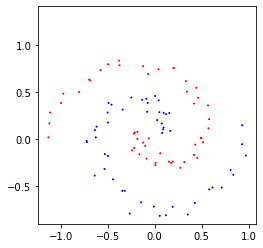

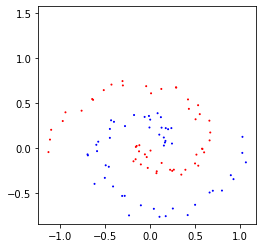

AttributeError: 'int' object has no attribute 'fast_forward'

In [23]:
from plotting import *

#Plotter de K lagene i Y0
plot_progression(YK_list, C_colors)
int_list = YK_list.shape[2]
for k in range(K):
    plot_model(int_list, YK_list[k], C, I)

#SPM: Blir plottene heelt like nå? :( men print(YK_list[1]-YK_list[0]) != 0 :((